<a href="https://colab.research.google.com/github/Aicoaching2025/311_Service_Requests/blob/main/data_602_final_project_codebase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Import, Environment Setup, and Visualization Configuration

# NYC Electricity Demand Forecasting
## Abstract

According to The ISO's 2025-2034 Comprehensive Reliability Plan, New York State's electric system faces "an era of profound reliability challenges" driven by the state's aging generation fleet, rapid growth of large loads—including data centers and manufacturing facilities—and increasing difficulty developing new supply resources due to public policies, supply chain constraints, and rising equipment costs.


**Why Energy Forecasting Is Critical Now**

The New York Independent System Operator (NYISO) and Con Edison have issued warnings of potential summer reliability issues and brownouts, highlighting the urgent need for strategic energy planning to maintain grid stability. New York City's power generation fleet is among the oldest in the nation, with potential shortfalls predicted as early as summer 2026 if new resources are not added quickly. NYISO projections indicate that without intervention, demand growth will outpace available generation capacity, creating dangerous reliability gaps during peak consumption periods.

**Research  question**

How can historical natural gas consumption patterns in NYCHA housing be used to predict energy demand and mitigate the risk of overconsumption and blackouts across New York City?

Using 15 years of NYC electricity consumption data, 2010-2025, this study employs data anlysis to


## Introduction

New York City faces increasing pressure on its energy infrastructure due to aging systems, climate change, and growing demand. During extreme weather events — both winter heating peaks and summer cooling surges — the risk of energy overconsumption and grid failure increases significantly. NYCHA housing, serving over 400,000 residents across five boroughs, represents a substantial portion of the city's energy demand.
This study conducts an exploratory data analysis of natural gas consumption (Therms) across NYCHA developments to:

Identify consumption patterns by borough, vendor, and season that contribute to peak demand
Compare charges and usage between primary utility providers (National Grid and ConEd)
Assess data quality to ensure reliable inputs for predictive modeling
Establish a foundation for forecasting models that can anticipate high-demand periods and support blackout prevention strategies

Understanding these patterns is critical for proactive energy management, infrastructure planning, and protecting vulnerable populations from service disruptions.

##### **Library Imports and Configuration Settings**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from scipy import stats
from scipy.stats import zscore, skew, kurtosis
from scipy.stats import normaltest, levene, kruskal, mannwhitneyu, spearmanr, pearsonr, zscore, skew, kurtosis
import warnings
from datetime import datetime
import calendar

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Display and Plotting Options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Custom color palette for boroughs

VENDOR_COLORS = {
    'ConEd': '#ff7f0e',
    'National Grid': '#1f77b4',
    'Direct Energy': '#2ca02c',
    'Other': '#7f7f7f'
}
BOROUGH_COLORS = {
    'MANHATTAN': '#1f77b4',
    'BROOKLYN': '#ff7f0e',
    'BRONX': '#2ca02c',
    'QUEENS': '#d62728',
    'STATEN ISLAND': '#9467bd',
    'NON DEVELOPMENT FACILITY': '#FF00FF',
    'FHA': '#000080'


}

# Exploratory Data Analysis
Exploratory Data Analysis examined the distribution and variability of utility charges across boroughs, funding sources, and energy providers. Median charges were compared across boroughs to identify structural cost differences, while boxplots revealed substantial within-borough variability driven by location and provider. Further stratification by funding source and vendor highlighted systematic differences in pricing behavior. These findings indicate that both geographic and administrative factors contribute meaningfully to observed cost variation.

In [ ]:
#============================================
# UPLOAD CSV FILE AND LOAD AS DATAFRAME
# ============================================

from google.colab import files
import pandas as pd

# Upload the file
print("Please select your CSV file to upload:")
uploaded = files.upload()

# Get the filename and load as DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_csv("Energy_usage.csv")

# Confirm successful load
print(f"\n✓ File '{filename}' loaded successfully!")
print(f"  • Rows: {df.shape[0]:,}")
print(f"  • Columns: {df.shape[1]}")
print(f"\nFirst 5 rows:")
df.head()

Please select your CSV file to upload:


Saving Energy_usage.csv to Energy_usage.csv

✓ File 'Energy_usage.csv' loaded successfully!
  • Rows: 239,955
  • Columns: 25

First 5 rows:


,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,UMIS BILL ID,Revenue Month,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (Therms),ES Commodity,Underlying Utility
0,SACK WERN,BRONX,SACK WERN,BLD 02,NONE,NaN,280.00,506,B028000,FEDERAL,NY005012800P,CONSOLIDATED EDISON COMPANY OF NY,4633845,2015-11,10/23/15,11/23/15,31.00,3515987,N,395.99,Trans Gen Non-Res,Yes,676.33,UTILITY GAS,ConEd
1,SARATOGA VILLAGE,BROOKLYN,SARATOGA VILLAGE,BLD 01,AMR,NaN,158.00,274,K015800,FEDERAL,NY005011620P,National Grid NYC,4601956,2015-11,10/23/15,11/23/15,31.00,9433620,N,"3,155.67",T3 TRAN MULT FAM,Yes,"9,377.00",UTILITY GAS,NatGrid NYC
2,ARMSTRONG I,BROOKLYN,ARMSTRONG I,BLD 06,Not Applicable,NaN,210.00,325,K021000,FEDERAL,NY005012100P,DIRECT ENERGY BUSINESS (32179),4689673,2015-12,11/24/15,12/23/15,29.00,248910600,N,"7,177.00",NaN,Yes,"12,260.00",BROKERED GAS,NatGrid NYC
3,ARMSTRONG I,BROOKLYN,ARMSTRONG I,BLD 10,Not Applicable,NaN,210.00,325,K021000,FEDERAL,NY005012100P,DIRECT ENERGY BUSINESS (32179),4689680,2015-12,11/24/15,12/23/15,29.00,248911520,NaN,0.00,NaN,Yes,0.00,BROKERED GAS,NatGrid NYC
4,ARMSTRONG I,BROOKLYN,ARMSTRONG I,BLD 08,Not Applicable,NaN,210.00,325,K021000,FEDERAL,NY005012100P,DIRECT ENERGY BUSINESS (32179),4689682,2015-12,11/24/15,12/23/15,29.00,248911700,N,"4,962.44",NaN,Yes,"8,477.00",BROKERED GAS,NatGrid NYC


#### **Dataset Overview**

In [ ]:
print("\n DATASET SIZE")
print("="*60)
print(f"Number of Rows: {df.shape[0]:,}")
print(f"Number of Columns: {df.shape[1]}")
print(f"Total Data Points: {df.shape[0] * df.shape[1]:,}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(df.info())


 DATASET SIZE
Number of Rows: 239,955
Number of Columns: 25
Total Data Points: 5,998,875
Memory Usage: 260.11 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239955 entries, 0 to 239954
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Development Name      238967 non-null  object 
 1   Borough               239955 non-null  object 
 2   Account Name          239955 non-null  object 
 3   Location              235699 non-null  object 
 4   Meter AMR             238482 non-null  object 
 5   Meter Scope           48803 non-null   object 
 6   TDS #                 236958 non-null  float64
 7   EDP                   239955 non-null  int64  
 8   RC Code               239955 non-null  object 
 9   Funding Source        239955 non-null  object 
 10  AMP #                 236962 non-null  object 
 11  Vendor Name           239955 non-null  object 
 12  UMIS BILL ID          239955 non-null  int

In [ ]:
print(df.head)
#print(df.tail)

<bound method NDFrame.head of         Development Name   Borough      Account Name Location       Meter AMR  \
0              SACK WERN     BRONX         SACK WERN   BLD 02            NONE   
1       SARATOGA VILLAGE  BROOKLYN  SARATOGA VILLAGE   BLD 01             AMR   
2            ARMSTRONG I  BROOKLYN       ARMSTRONG I   BLD 06  Not Applicable   
3            ARMSTRONG I  BROOKLYN       ARMSTRONG I   BLD 10  Not Applicable   
4            ARMSTRONG I  BROOKLYN       ARMSTRONG I   BLD 08  Not Applicable   
...                  ...       ...               ...      ...             ...   
239950   WYCKOFF GARDENS  BROOKLYN   WYCKOFF GARDENS   BLD 03             AMR   
239951   WYCKOFF GARDENS  BROOKLYN   WYCKOFF GARDENS   BLD 03             AMR   
239952   WYCKOFF GARDENS  BROOKLYN   WYCKOFF GARDENS   BLD 03             AMR   
239953   WYCKOFF GARDENS  BROOKLYN   WYCKOFF GARDENS   BLD 03             AMR   
239954   WYCKOFF GARDENS  BROOKLYN   WYCKOFF GARDENS   BLD 03             AMR  

#### **Statistical Summary for Numeric Columns**

### Essential Questions for Data Analysis

In [ ]:
print(df.describe().T)

                          count         mean          std          min  \
TDS #                236,958.00       248.04       132.51         0.00   
EDP                  239,955.00       500.00       201.71       200.00   
UMIS BILL ID         239,955.00 6,102,031.85 3,579,783.46 1,755,537.00   
# days               239,946.00        30.29         9.77      -335.00   
Current Charges      239,955.00    10,723.87    29,123.85   -54,559.03   
Consumption (Therms) 239,955.00    19,776.74    48,436.45  -277,156.09   
exact_duplicates     239,955.00    22,620.00         0.00    22,620.00   
duplicate_bill_ids   239,955.00    33,837.00         0.00    33,837.00   

                              25%          50%          75%           max  
TDS #                      147.00       278.00       342.00        582.00  
EDP                        322.00       507.00       650.00      5,357.00  
UMIS BILL ID         2,440,808.50 5,552,763.00 8,778,274.50 14,904,804.00  
# days                      2

#### **Unique Values for Categorical Columns**

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
        unique_count = df[col].nunique()
        print(f"{col}: {unique_count:,} unique values")

Development Name: 379 unique values
Borough: 7 unique values
Account Name: 321 unique values
Location: 154 unique values
Meter AMR: 4 unique values
Meter Scope: 99 unique values
RC Code: 358 unique values
Funding Source: 6 unique values
AMP #: 289 unique values
Vendor Name: 11 unique values
Revenue Month: 168 unique values
Service Start Date: 2,819 unique values
Service End Date: 2,274 unique values
Meter Number: 1,622 unique values
Estimated: 2 unique values
Rate Class: 36 unique values
Bill Analyzed: 3 unique values
ES Commodity: 2 unique values
Underlying Utility: 4 unique values


#### **Missing Data Assessment**

                    Missing Count  Missing % Data Type
Meter Scope                191152      79.66    object
Rate Class                 110536      46.07    object
Estimated                    5666       2.36    object
Location                     4256       1.77    object
TDS #                        2997       1.25   float64
AMP #                        2993       1.25    object
Meter AMR                    1473       0.61    object
Development Name              988       0.41    object
Underlying Utility            972       0.41    object
Service Start Date              9       0.00    object
Service End Date                9       0.00    object
# days                          9       0.00   float64


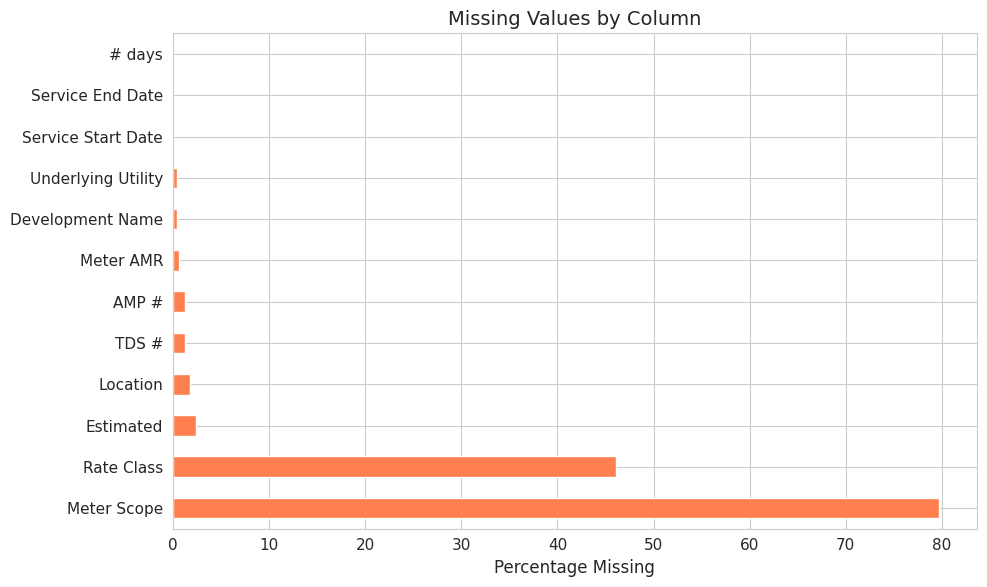

In [ ]:
missing_stats = pd.DataFrame({
        'Missing Count': df.isnull().sum(),
        'Missing %': (df.isnull().sum() / len(df) * 100).round(2),
        'Data Type': df.dtypes
    }).sort_values('Missing %', ascending=False)

missing_stats = missing_stats[missing_stats['Missing Count'] > 0]

if len(missing_stats) > 0:
        print(missing_stats)

else:
        print("No missing values detected.")


# Visualize missing values
if len(missing_stats) > 0:
  fig, ax = plt.subplots(figsize=(10, 6))
  missing_stats['Missing %'].plot(kind='barh', ax=ax, color='coral')
  ax.set_xlabel('Percentage Missing')
  ax.set_title('Missing Values by Column')
  plt.tight_layout()
  plt.savefig('fig_missing_values.png', dpi=300, bbox_inches='tight')
  plt.show()

#### **Duplicates**

In [ ]:
# Exact duplicates
exact_dupes = df.duplicated().sum()
print(f"Exact duplicate rows: {exact_dupes:,} ({exact_dupes/len(df)*100:.2f}%)")
df['exact_duplicates'] = exact_dupes

# Check for duplicate bill IDs (should be unique)
if 'UMIS BILL ID' in df.columns:
  bill_dupes = df['UMIS BILL ID'].duplicated().sum()
  print(f"Duplicate Bill IDs: {bill_dupes:,}")
  df['duplicate_bill_ids'] = bill_dupes

Exact duplicate rows: 22,620 (9.43%)
Duplicate Bill IDs: 33,837


#### **Check numeric columns that might be stored as strings**

In [ ]:
# Check numeric and date columns

issues = []
numeric_cols = ['Current Charges', 'Consumption (Therms)', '# days']
for col in numeric_cols:
  if col in df.columns:
    if df[col].dtype == 'object':
                issues.append(f"  - {col}: stored as object, should be numeric")

# Check date columns
date_cols = ['Service Start Date', 'Service End Date', 'Revenue Month']
for col in date_cols:
  if col in df.columns:
    if df[col].dtype == 'object':
                issues.append(f"  - {col}: stored as object, should be datetime")

    if issues:
        print("Data type issues detected:")
        for issue in issues:
            print(issue)
    else:
        print("No data type issues detected.")


Data type issues detected:
  - Service Start Date: stored as object, should be datetime
Data type issues detected:
  - Service Start Date: stored as object, should be datetime
  - Service End Date: stored as object, should be datetime
Data type issues detected:
  - Service Start Date: stored as object, should be datetime
  - Service End Date: stored as object, should be datetime
  - Revenue Month: stored as object, should be datetime


#### **Zero and Negative Values Check**

In [ ]:
check_cols = ['Current Charges', 'Consumption (Therms)', '# days']
for col in check_cols:
  if col in df.columns:
    zeros = (df[col] == 0).sum()
    negatives = (df[col] < 0).sum()
    print(f"{col}:")
    print(f"  - Zero values: {zeros:,} ({zeros/len(df)*100:.2f}%)")
    print(f"  - Negative values: {negatives:,} ({negatives/len(df)*100:.2f}%)")


Current Charges:
  - Zero values: 6,615 (2.76%)
  - Negative values: 23 (0.01%)
Consumption (Therms):
  - Zero values: 14,462 (6.03%)
  - Negative values: 149 (0.06%)
# days:
  - Zero values: 7 (0.00%)
  - Negative values: 6 (0.00%)


# Data Wrangling

#### **Column Standardization**

In [ ]:
# Create mapping for cleaner column names
column_mapping = {
        'Development Name': 'development_name',
        'Borough': 'borough',
        'Account Name': 'account_name',
        'Location': 'location',
        'Meter AMR': 'meter_amr',
        'Meter Scope': 'meter_scope',
        'TDS #': 'tds_number',
        'EDP': 'edp',
        'RC Code': 'rc_code',
        'Funding Source': 'funding_source',
        'AMP #': 'amp_number',
        'Vendor Name': 'vendor_name',
        'UMIS BILL ID': 'bill_id',
        'Revenue Month': 'revenue_month',
        'Service Start Date': 'service_start_date',
        'Service End Date': 'service_end_date',
        '# days': 'billing_days',
        'Meter Number': 'meter_number',
        'Estimated': 'estimated',
        'Current Charges': 'current_charges',
        'Rate Class': 'rate_class',
        'Bill Analyzed': 'bill_analyzed',
        'Consumption (Therms)': 'consumption_therms',
        'ES Commodity': 'commodity_type'
    }

df_clean = df.rename(columns=column_mapping)
print(f"Columns renamed: {len(column_mapping)}")

Columns renamed: 24


#### **Convert Data Types**

In [ ]:
# Convert numeric columns (handle currency formatting)
if 'current_charges' in df_clean.columns:
  if df_clean['current_charges'].dtype == 'object':
    df_clean['current_charges'] = (df_clean['current_charges']
                                           .str.replace('$', '', regex=False)
                                           .str.replace(',', '', regex=False)
                                           .astype(float))
print("  - current_charges converted to float")

if 'consumption_therms' in df_clean.columns:
  df_clean['consumption_therms'] = pd.to_numeric(df_clean['consumption_therms'], errors='coerce')
  print("  - consumption_therms converted to float")

if 'billing_days' in df_clean.columns:
  df_clean['billing_days'] = pd.to_numeric(df_clean['billing_days'], errors='coerce')
  print("  - billing_days converted to numeric")

# Convert date columns
if 'revenue_month' in df_clean.columns:
  df_clean['revenue_month'] = pd.to_datetime(df_clean['revenue_month'], format='%Y-%m', errors='coerce')
  print("  - revenue_month converted to datetime")

if 'service_start_date' in df_clean.columns:
  df_clean['service_start_date'] = pd.to_datetime(df_clean['service_start_date'], errors='coerce')
  print("  - service_start_date converted to datetime")

if 'service_end_date' in df_clean.columns:
  df_clean['service_end_date'] = pd.to_datetime(df_clean['service_end_date'], errors='coerce')
  print("  - service_end_date converted to datetime")

  - current_charges converted to float
  - consumption_therms converted to float
  - billing_days converted to numeric
  - revenue_month converted to datetime
  - service_start_date converted to datetime
  - service_end_date converted to datetime


#### **Standardize Categorical Values**

In [ ]:
# Standardize borough names
if 'borough' in df_clean.columns:
  df_clean['borough'] = df_clean['borough'].str.strip().str.title()
  print(f"  - Boroughs standardized: {df_clean['borough'].unique()}")

# Categorize vendors
def categorize_vendor(vendor):
  if pd.isna(vendor):
    return 'Other'
  vendor_upper = str(vendor).upper()
  if 'CONSOLIDATED EDISON' in vendor_upper or 'CON ED' in vendor_upper:
    return 'ConEd'
  elif 'NATIONAL GRID' in vendor_upper:
    return 'National Grid'
  elif 'DIRECT ENERGY' in vendor_upper:
    return 'Direct Energy'
  elif 'HUDSON ENERGY' in vendor_upper:
    return 'Hudson Energy'
  elif 'EAST COAST POWER' in vendor_upper:
    return 'East Coast Power'
  elif 'HESS' in vendor_upper:
    return 'Hess'
  else:
    return 'Other'

df_clean['vendor_category'] = df_clean['vendor_name'].apply(categorize_vendor)
print(f"  - Vendor categories created:\n{df_clean['vendor_category'].value_counts()}")

# Categorize commodity type (Utility vs Brokered)
if 'commodity_type' in df_clean.columns:
  df_clean['gas_type'] = df_clean['commodity_type'].apply(
     lambda x: 'Utility' if 'UTILITY' in str(x).upper() else
              ('Brokered' if 'BROKERED' in str(x).upper() else 'Other')
        )
  print(f"  - Gas type categories:\n{df_clean['gas_type'].value_counts()}")



  - Boroughs standardized: ['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Fha'
 'Non Development Facility']
  - Vendor categories created:
vendor_category
ConEd               69757
National Grid       59839
Direct Energy       39282
Hess                29465
East Coast Power    18160
Other               14318
Hudson Energy        9134
Name: count, dtype: int64
  - Gas type categories:
gas_type
Utility     129596
Brokered    110359
Name: count, dtype: int64


#### **Extract Time Components**

#### **Removing non borough data from the column**

Records containing "FHA" and "Non Development" in the Borough column were removed because these values represent funding sources and facility types rather than valid NYC geographic locations, violating the domain constraint that Borough must be one of the five NYC boroughs (Bronx, Brooklyn, Manhattan, Queens, Staten Island).

These misclassified records cannot be meaningfully included in borough-level comparative analyses, which is central to this study's research questions. Their removal ensures data integrity and allows for accurate geographic segmentation of energy consumption patterns across NYCHA housing developments.

In [ ]:
# Define valid NYC boroughs
valid_boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

# Filter to keep only valid boroughs
df_clean = df[df['Borough'].str.strip().str.title().isin(valid_boroughs)].copy()

# Verify removal
print(f"Original records: {len(df):,}")
print(f"Records after removal: {len(df_clean):,}")
print(f"Records removed: {len(df) - len(df_clean):,}")

Original records: 239,955
Records after removal: 232,742
Records removed: 7,213


In [ ]:
# Re-apply column renaming and type conversion locally for robustness.
# This is a temporary measure due to `df_clean` being reset in an earlier cell. A better
# structural fix would be to modify the cell that re-initializes `df_clean` (`RhrtEAu3oDau`).

# Ensure column_mapping is available (it should be from previous execution)
column_mapping = {
        'Development Name': 'development_name',
        'Borough': 'borough',
        'Account Name': 'account_name',
        'Location': 'location',
        'Meter AMR': 'meter_amr',
        'Meter Scope': 'meter_scope',
        'TDS #': 'tds_number',
        'EDP': 'edp',
        'RC Code': 'rc_code',
        'Funding Source': 'funding_source',
        'AMP #': 'amp_number',
        'Vendor Name': 'vendor_name',
        'UMIS BILL ID': 'bill_id',
        'Revenue Month': 'revenue_month',
        'Service Start Date': 'service_start_date',
        'Service End Date': 'service_end_date',
        '# days': 'billing_days',
        'Meter Number': 'meter_number',
        'Estimated': 'estimated',
        'Current Charges': 'current_charges',
        'Rate Class': 'rate_class',
        'Bill Analyzed': 'bill_analyzed',
        'Consumption (Therms)': 'consumption_therms',
        'ES Commodity': 'commodity_type',
        'Underlying Utility': 'underlying_utility'
    }

# Re-apply column renaming (using the filtered df_clean from RhrtEAu3oDau, which has original names)
df_clean = df_clean.rename(columns=column_mapping)

# Re-apply type conversion
if 'current_charges' in df_clean.columns:
  if df_clean['current_charges'].dtype == 'object':
    df_clean['current_charges'] = (df_clean['current_charges']
                                           .str.replace('$', '', regex=False)
                                           .str.replace(',', '', regex=False)
                                           .astype(float))

if 'consumption_therms' in df_clean.columns:
  df_clean['consumption_therms'] = pd.to_numeric(df_clean['consumption_therms'], errors='coerce')

if 'billing_days' in df_clean.columns:
  df_clean['billing_days'] = pd.to_numeric(df_clean['billing_days'], errors='coerce')

if 'revenue_month' in df_clean.columns:
  df_clean['revenue_month'] = pd.to_datetime(df_clean['revenue_month'], format='%Y-%m', errors='coerce')

if 'service_start_date' in df_clean.columns:
  df_clean['service_start_date'] = pd.to_datetime(df_clean['service_start_date'], errors='coerce')

if 'service_end_date' in df_clean.columns:
  df_clean['service_end_date'] = pd.to_datetime(df_clean['service_end_date'], errors='coerce')


# Original code from cell V-6jTxSwWMmI starts here:

if 'revenue_month' in df_clean.columns:
  df_clean['year'] = df_clean['revenue_month'].dt.year
  df_clean['month'] = df_clean['revenue_month'].dt.month
  df_clean['month_name'] = df_clean['revenue_month'].dt.month_name()
  df_clean['quarter'] = df_clean['revenue_month'].dt.quarter
  print("  - Year, Month, Quarter extracted from revenue_month")

# Calculate cost per therm
if 'current_charges' in df_clean.columns and 'consumption_therms' in df_clean.columns:
  df_clean['cost_per_therm'] = np.where(
  df_clean['consumption_therms'] > 0,
  df_clean['current_charges'] / df_clean['consumption_therms'],
            np.nan
  )
  print("  - cost_per_therm calculated")

# Calculate daily consumption
if 'consumption_therms' in df_clean.columns and 'billing_days' in df_clean.columns:
  df_clean['daily_consumption'] = np.where(
    df_clean['billing_days'] > 0,
    df_clean['consumption_therms'] / df_clean['billing_days'],
    np.nan
  )
  print("  - daily_consumption calculated")

# Calculate daily charges
if 'current_charges' in df_clean.columns and 'billing_days' in df_clean.columns:
  df_clean['daily_charges'] = np.where(
    df_clean['billing_days'] > 0,
    df_clean['current_charges'] / df_clean['billing_days'],
    np.nan
  )
  print("  - daily_charges calculated")

# Create heating season indicator (Oct-Apr = heating season)
if 'month' in df_clean.columns:
  df_clean['is_heating_season'] = df_clean['month'].isin([10, 11, 12, 1, 2, 3, 4])
  print("  - is_heating_season indicator created")

# 4.5 Handle Missing and Zero Values

initial_rows = len(df_clean)

# Remove rows with zero consumption AND zero charges (likely errors)
zero_mask = (df_clean['consumption_therms'] == 0) & (df_clean['current_charges'] == 0)
zero_count = zero_mask.sum()
print(f"  - Rows with zero consumption AND zero charges: {zero_count:,}")

# Flag but don't remove (may be valid for analysis of billing errors)
df_clean['is_zero_record'] = zero_mask

  - Year, Month, Quarter extracted from revenue_month
  - cost_per_therm calculated
  - daily_consumption calculated
  - daily_charges calculated
  - is_heating_season indicator created
  - Rows with zero consumption AND zero charges: 6,289


# Data Analysis

#### **Univariate Analysis**

Mean: 21,709.78 therms
Median: 2,555.00 therms
Std Dev: 50,275.22 therms
Skewness: 5.1645
Kurtosis: 74.5234
Min: 0.18 therms
Max: 2,351,667.00 therms
Range: 2,351,666.82 therms

D'Agostino-Pearson Normality Test:
  Statistic: 4043.5737, p-value: 0.0000e+00
  Normal distribution: No


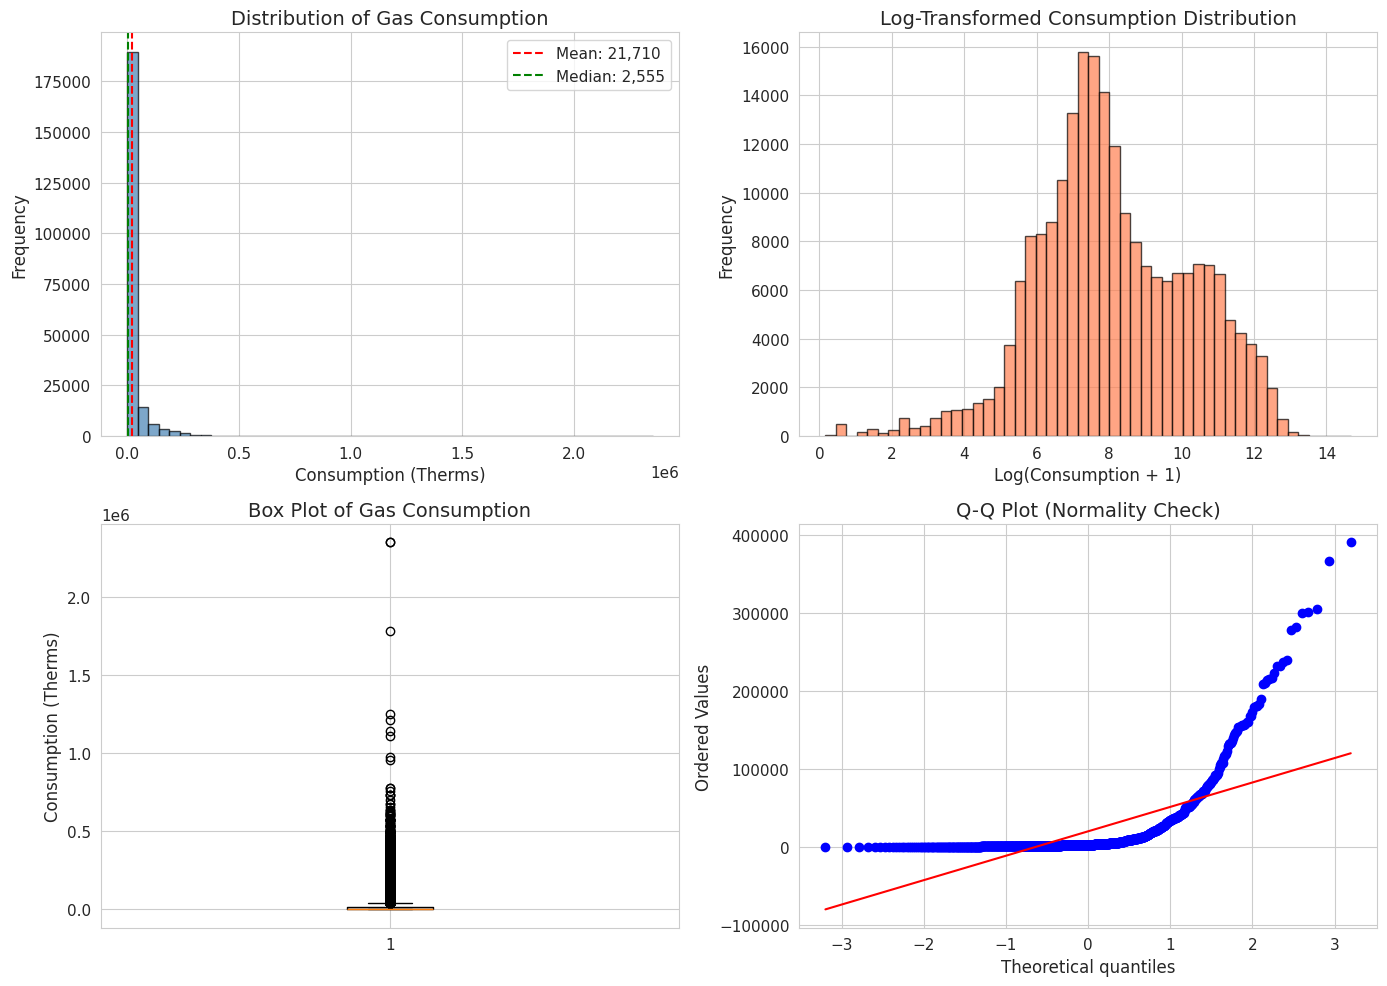


----------------------------------------
5.2 CURRENT CHARGES DISTRIBUTION
----------------------------------------
Mean: $11,358.94
Median: $1,333.32
Skewness: 6.6692
Kurtosis: 93.5539

----------------------------------------
5.3 CATEGORICAL VARIABLE DISTRIBUTIONS
----------------------------------------


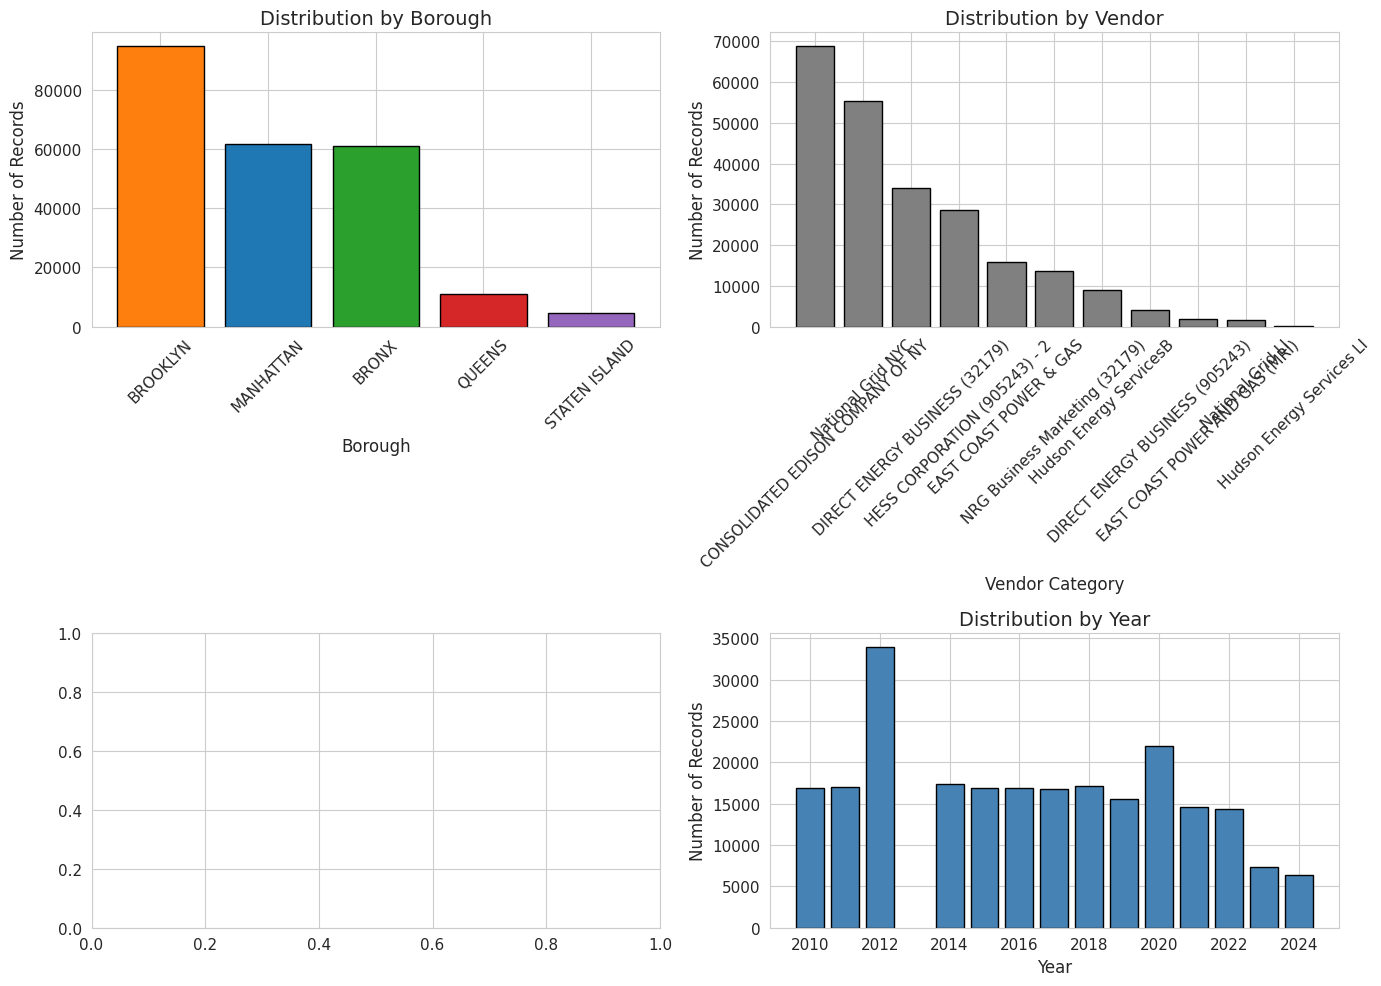


Borough Distribution:
borough
BROOKLYN         94570
MANHATTAN        61469
BRONX            60953
QUEENS           11197
STATEN ISLAND     4553
Name: count, dtype: int64

Vendor Category Distribution:
vendor_name
CONSOLIDATED EDISON COMPANY OF NY    68735
National Grid NYC                    55367
DIRECT ENERGY BUSINESS (32179)       33909
HESS CORPORATION (905243) - 2        28635
EAST COAST POWER & GAS               15807
NRG Business Marketing (32179)       13724
Hudson Energy ServicesB               8914
DIRECT ENERGY BUSINESS (905243)       4203
EAST COAST POWER AND GAS (MRI)        1807
National Grid LI                      1568
Hudson Energy Services LI               73
Name: count, dtype: int64


In [ ]:
consumption = df_clean['consumption_therms'].dropna()
consumption_positive = consumption[consumption > 0]

print(f"Mean: {consumption_positive.mean():,.2f} therms")
print(f"Median: {consumption_positive.median():,.2f} therms")
print(f"Std Dev: {consumption_positive.std():,.2f} therms")
print(f"Skewness: {consumption_positive.skew():.4f}")
print(f"Kurtosis: {consumption_positive.kurtosis():.4f}")
print(f"Min: {consumption_positive.min():,.2f} therms")
print(f"Max: {consumption_positive.max():,.2f} therms")
print(f"Range: {consumption_positive.max() - consumption_positive.min():,.2f} therms")

# Normality test
if len(consumption_positive) > 8:
  stat, p_value = normaltest(consumption_positive.sample(min(5000, len(consumption_positive))))
  print(f"\nD'Agostino-Pearson Normality Test:")
  print(f"  Statistic: {stat:.4f}, p-value: {p_value:.4e}")
  print(f"  Normal distribution: {'No' if p_value < 0.05 else 'Yes'}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
axes[0, 0].hist(consumption_positive, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(consumption_positive.mean(), color='red', linestyle='--', label=f'Mean: {consumption_positive.mean():,.0f}')
axes[0, 0].axvline(consumption_positive.median(), color='green', linestyle='--', label=f'Median: {consumption_positive.median():,.0f}')
axes[0, 0].set_xlabel('Consumption (Therms)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Gas Consumption')
axes[0, 0].legend()

# Log-transformed histogram
axes[0, 1].hist(np.log1p(consumption_positive), bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Log(Consumption + 1)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Log-Transformed Consumption Distribution')

# Box plot
axes[1, 0].boxplot(consumption_positive, vert=True)
axes[1, 0].set_ylabel('Consumption (Therms)')
axes[1, 0].set_title('Box Plot of Gas Consumption')

# QQ plot
stats.probplot(consumption_positive.sample(min(1000, len(consumption_positive))), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)')

plt.tight_layout()
plt.savefig('fig_consumption_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 5.2 Distribution of Current Charges
print("\n" + "-" * 40)
print("5.2 CURRENT CHARGES DISTRIBUTION")
print("-" * 40)

charges = df_clean['current_charges'].dropna()
charges_positive = charges[charges > 0]

print(f"Mean: ${charges_positive.mean():,.2f}")
print(f"Median: ${charges_positive.median():,.2f}")
print(f"Skewness: {charges_positive.skew():.4f}")
print(f"Kurtosis: {charges_positive.kurtosis():.4f}")

# 5.3 Categorical Variable Distributions
print("\n" + "-" * 40)
print("5.3 CATEGORICAL VARIABLE DISTRIBUTIONS")
print("-" * 40)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Borough distribution
borough_counts = df_clean['borough'].value_counts()
axes[0, 0].bar(borough_counts.index, borough_counts.values,
              color=[BOROUGH_COLORS.get(b, 'gray') for b in borough_counts.index],
              edgecolor='black')
axes[0, 0].set_xlabel('Borough')
axes[0, 0].set_ylabel('Number of Records')
axes[0, 0].set_title('Distribution by Borough')
axes[0, 0].tick_params(axis='x', rotation=45)

# Vendor distribution
vendor_counts = df_clean['vendor_name'].value_counts()
axes[0, 1].bar(vendor_counts.index, vendor_counts.values,
              color=[VENDOR_COLORS.get(v, 'gray') for v in vendor_counts.index],
              edgecolor='black')
axes[0, 1].set_xlabel('Vendor Category')
axes[0, 1].set_ylabel('Number of Records')
axes[0, 1].set_title('Distribution by Vendor')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gas type distribution
if 'gas_type' in df_clean.columns:
  gas_counts = df_clean['gas_type'].value_counts()
  axes[1, 0].pie(gas_counts.values, labels=gas_counts.index, autopct='%1.1f%%',
                colors=['#66b3ff', '#99ff99', '#ffcc99'])
  axes[1, 0].set_title('Utility vs Brokered Gas Distribution')

# Year distribution
if 'year' in df_clean.columns:
  year_counts = df_clean['year'].value_counts().sort_index()
  axes[1, 1].bar(year_counts.index, year_counts.values, color='steelblue', edgecolor='black')
  axes[1, 1].set_xlabel('Year')
  axes[1, 1].set_ylabel('Number of Records')
  axes[1, 1].set_title('Distribution by Year')

plt.tight_layout()
plt.savefig('fig_categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Print categorical summaries
print(f"\nBorough Distribution:\n{df_clean['borough'].value_counts()}")
print(f"\nVendor Category Distribution:\n{df_clean['vendor_name'].value_counts()}")

#### **Bivariate Analysis**

Vendor Code Mapping:
                          vendor_name vendor_code  count
0   CONSOLIDATED EDISON COMPANY OF NY          CE  68735
1      DIRECT ENERGY BUSINESS (32179)          DE  33909
2     DIRECT ENERGY BUSINESS (905243)         OTH   4203
3              EAST COAST POWER & GAS         ECP  15807
4      EAST COAST POWER AND GAS (MRI)         OTH   1807
5       HESS CORPORATION (905243) - 2        HESS  28635
6           Hudson Energy Services LI         OTH     73
7             Hudson Energy ServicesB          HE   8914
8      NRG Business Marketing (32179)         OTH  13724
9                    National Grid LI       NG-LI   1568
10                  National Grid NYC      NG-NYC  55367
Pearson Correlation: 0.9008 (p-value: 0.0000e+00)
Spearman Correlation: 0.9824 (p-value: 0.0000e+00)


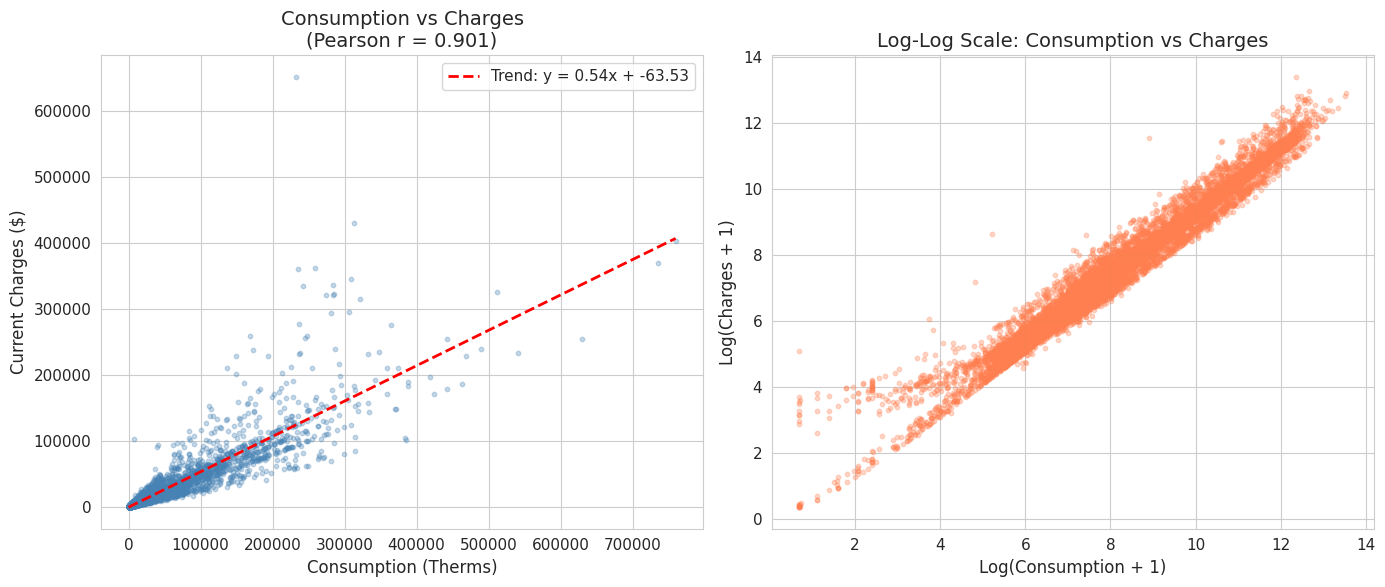

               count      mean    median       std  min          max
borough                                                             
BRONX          56208 21,941.38  2,884.00 52,117.57 0.18 1,784,927.64
BROOKLYN       91001 18,002.14  1,790.00 45,376.59 0.30 2,351,667.00
MANHATTAN      56677 22,769.18  2,732.00 51,465.27 0.20 1,253,053.00
QUEENS         10295 44,762.18 17,802.00 70,705.10 0.60   604,020.00
STATEN ISLAND   4417 27,610.63 17,868.17 29,039.32 1.00   167,333.00

Kruskal-Wallis Test:
  H-statistic: 6636.9183, p-value: 0.0000e+00
  Significant difference between boroughs: Yes


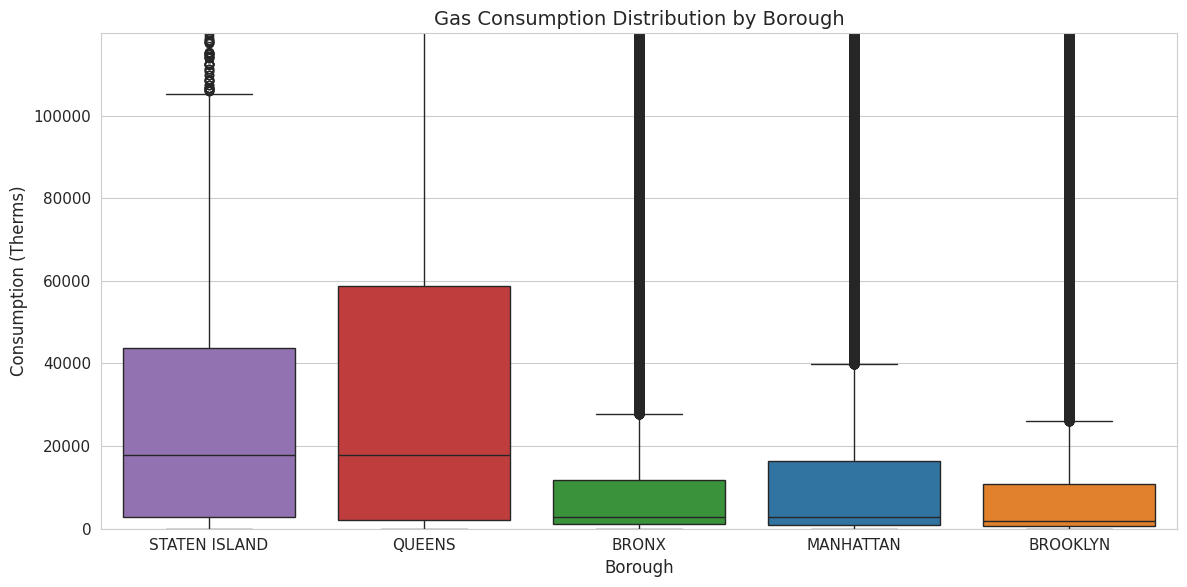

             count      mean    median       std
vendor_code                                     
CE           63009 23,595.43  2,925.00 53,890.97
DE           32165 22,312.22  2,722.00 50,559.77
ECP          14822 26,075.47  2,938.00 56,874.50
HE            8766 18,500.68  2,376.50 40,139.38
HESS         26886 19,709.66  2,540.00 46,607.96
NG-LI         1319 43,605.05 19,565.00 68,507.91
NG-NYC       53199 18,593.22  1,882.00 43,951.32
OTH          18432 22,522.31  2,425.50 55,015.45
             count  mean  median  std
vendor_code                          
CE           62723  0.82    0.71 0.49
DE           32158  0.51    0.53 0.09
ECP          14822  0.43    0.40 0.09
HE            8766  0.56    0.56 0.05
HESS         26885  0.59    0.59 0.16
NG-LI         1282  1.75    0.34 2.42
NG-NYC       53012  0.49    0.40 0.44
OTH          18423  0.48    0.47 0.20


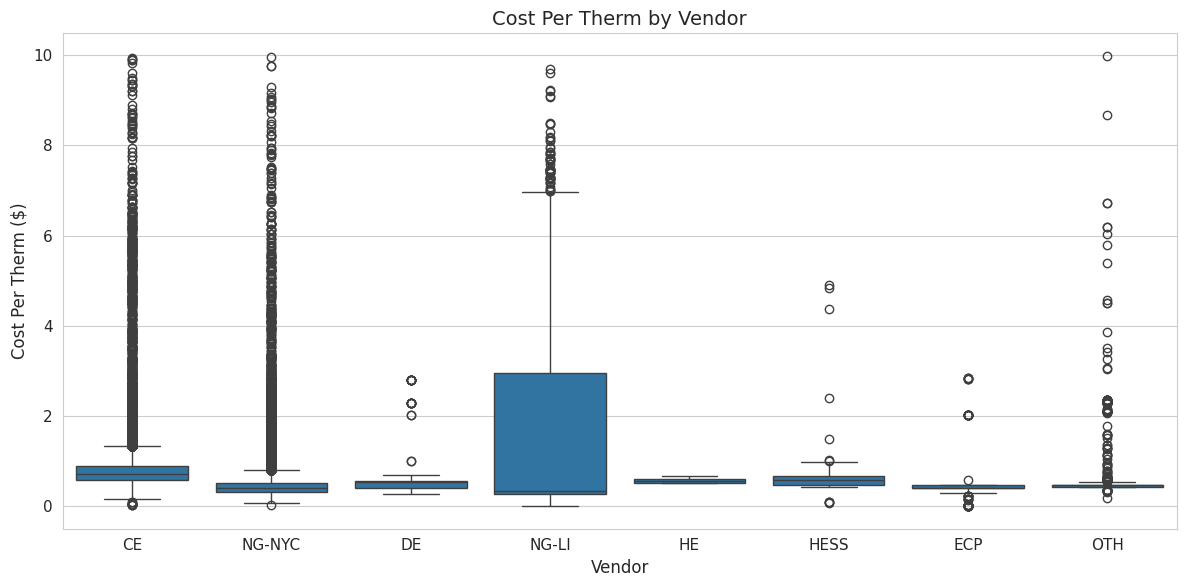


----------------------------------------
6.5 NATIONAL GRID vs CONED COMPARISON
----------------------------------------

Consumption Comparison:
  National Grid - Mean: 19,198.35, Median: 1,917.00
  ConEd - Mean: 23,595.43, Median: 2,925.00

Charges Comparison:
  National Grid - Mean: $6,728.22, Median: $771.20
  ConEd - Mean: $16,479.88, Median: $2,260.34

Mann-Whitney U Test (Charges):
  U-statistic: 1,227,947,283.00, p-value: 0.0000e+00
  Significant difference: Yes


In [ ]:


vendor_codes = {
    'CONSOLIDATED EDISON COMPANY OF NY': 'CE',
    'National Grid NYC': 'NG-NYC',
    'National Grid LI': 'NG-LI',
    'DIRECT ENERGY BUSINESS (32179)': 'DE',
    'Hudson Energy ServicesB': 'HE',
    'EAST COAST POWER & GAS': 'ECP',
    'HESS CORPORATION (905243) - 2': 'HESS'
}

# Apply mapping to create new column
df_clean['vendor_code'] = df_clean['vendor_name'].map(vendor_codes).fillna('OTH')

# Verify the mapping
print("Vendor Code Mapping:")
print(df_clean.groupby(['vendor_name', 'vendor_code']).size().reset_index(name='count'))

# Filter for positive values
df_positive = df_clean[(df_clean['consumption_therms'] > 0) & (df_clean['current_charges'] > 0)].copy()

# Correlation analysis
pearson_corr, pearson_p = pearsonr(df_positive['consumption_therms'], df_positive['current_charges'])
spearman_corr, spearman_p = spearmanr(df_positive['consumption_therms'], df_positive['current_charges'])

print(f"Pearson Correlation: {pearson_corr:.4f} (p-value: {pearson_p:.4e})")
print(f"Spearman Correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4e})")

# Scatter plot with regression line
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sample for visualization (if dataset is large)
sample_size = min(10000, len(df_positive))
df_sample = df_positive.sample(sample_size)

axes[0].scatter(df_sample['consumption_therms'], df_sample['current_charges'],
               alpha=0.3, s=10, c='steelblue')
z = np.polyfit(df_sample['consumption_therms'], df_sample['current_charges'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_sample['consumption_therms'].min(), df_sample['consumption_therms'].max(), 100)
axes[0].plot(x_line, p(x_line), "r--", linewidth=2, label=f'Trend: y = {z[0]:.2f}x + {z[1]:.2f}')
axes[0].set_xlabel('Consumption (Therms)')
axes[0].set_ylabel('Current Charges ($)')
axes[0].set_title(f'Consumption vs Charges\n(Pearson r = {pearson_corr:.3f})')
axes[0].legend()

# Log-log scale
axes[1].scatter(np.log1p(df_sample['consumption_therms']),
                np.log1p(df_sample['current_charges']),
                alpha=0.3, s=10, c='coral')
axes[1].set_xlabel('Log(Consumption + 1)')
axes[1].set_ylabel('Log(Charges + 1)')
axes[1].set_title('Log-Log Scale: Consumption vs Charges')

plt.tight_layout()
plt.savefig('fig_consumption_vs_charges.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.2 Consumption by Borough

borough_stats = df_positive.groupby('borough')['consumption_therms'].agg([
  'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)
print(borough_stats)

# Kruskal-Wallis test (non-parametric ANOVA)
borough_groups = [group['consumption_therms'].values for name, group in df_positive.groupby('borough')]
h_stat, kw_p = kruskal(*borough_groups)
print(f"\nKruskal-Wallis Test:")
print(f"  H-statistic: {h_stat:.4f}, p-value: {kw_p:.4e}")
print(f"  Significant difference between boroughs: {'Yes' if kw_p < 0.05 else 'No'}")

# Box plot
fig, ax = plt.subplots(figsize=(12, 6))
borough_order = df_positive.groupby('borough')['consumption_therms'].median().sort_values(ascending=False).index
sns.boxplot(data=df_positive, x='borough', y='consumption_therms', order=borough_order,
            palette=BOROUGH_COLORS, ax=ax)
ax.set_xlabel('Borough')
ax.set_ylabel('Consumption (Therms)')
ax.set_title('Gas Consumption Distribution by Borough')
ax.set_ylim(0, df_positive['consumption_therms'].quantile(0.95))
plt.tight_layout()
plt.savefig('fig_consumption_by_borough.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.3 Consumption by Vendor - UPDATED to use vendor_code

vendor_stats = df_positive.groupby('vendor_code')['consumption_therms'].agg([  # <-- UPDATED
    'count', 'mean', 'median', 'std'
]).round(2)
print(vendor_stats)

# 6.4 Cost Per Therm by Vendor

df_valid_cost = df_positive[df_positive['cost_per_therm'].notna() &
                                 (df_positive['cost_per_therm'] > 0) &
                                 (df_positive['cost_per_therm'] < 10)]

cost_stats = df_valid_cost.groupby('vendor_code')['cost_per_therm'].agg([  # <-- UPDATED
        'count', 'mean', 'median', 'std'
    ]).round(4)
print(cost_stats)

# Box plot - UPDATED to use vendor_code
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_valid_cost, x='vendor_code', y='cost_per_therm', ax=ax)  # <-- UPDATED
ax.set_xlabel('Vendor')  # <-- UPDATED label
ax.set_ylabel('Cost Per Therm ($)')
ax.set_title('Cost Per Therm by Vendor')
plt.tight_layout()
plt.savefig('fig_cost_per_therm_by_vendor.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.5 National Grid vs ConEd Comparison - UPDATED to use vendor_code
print("\n" + "-" * 40)
print("6.5 NATIONAL GRID vs CONED COMPARISON")
print("-" * 40)

# Filter for NG-NYC and CE (main utilities)
ng_data = df_positive[df_positive['vendor_code'].isin(['NG-NYC', 'NG-LI'])]  # <-- UPDATED
coned_data = df_positive[df_positive['vendor_code'] == 'CE']  # <-- UPDATED

if len(ng_data) > 0 and len(coned_data) > 0:
    print("\nConsumption Comparison:")
    print(f"  National Grid - Mean: {ng_data['consumption_therms'].mean():,.2f}, "
          f"Median: {ng_data['consumption_therms'].median():,.2f}")
    print(f"  ConEd - Mean: {coned_data['consumption_therms'].mean():,.2f}, "
          f"Median: {coned_data['consumption_therms'].median():,.2f}")

    print("\nCharges Comparison:")
    print(f"  National Grid - Mean: ${ng_data['current_charges'].mean():,.2f}, "
          f"Median: ${ng_data['current_charges'].median():,.2f}")
    print(f"  ConEd - Mean: ${coned_data['current_charges'].mean():,.2f}, "
          f"Median: ${coned_data['current_charges'].median():,.2f}")

    # Mann-Whitney U test
    stat, p_value = mannwhitneyu(ng_data['current_charges'], coned_data['current_charges'])
    print(f"\nMann-Whitney U Test (Charges):")
    print(f"  U-statistic: {stat:,.2f}, p-value: {p_value:.4e}")
    print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")


#### **Multivariate Analysis**

Vendor Code Mapping:
                          vendor_name vendor_code  count
0   CONSOLIDATED EDISON COMPANY OF NY          CE  68735
1      DIRECT ENERGY BUSINESS (32179)          DE  33909
2     DIRECT ENERGY BUSINESS (905243)         OTH   4203
3              EAST COAST POWER & GAS         ECP  15807
4      EAST COAST POWER AND GAS (MRI)         OTH   1807
5       HESS CORPORATION (905243) - 2        HESS  28635
6           Hudson Energy Services LI         OTH     73
7             Hudson Energy ServicesB          HE   8914
8      NRG Business Marketing (32179)         OTH  13724
9                    National Grid LI       NG-LI   1568
10                  National Grid NYC      NG-NYC  55367
Pearson Correlation: 0.9008 (p-value: 0.0000e+00)
Spearman Correlation: 0.9824 (p-value: 0.0000e+00)


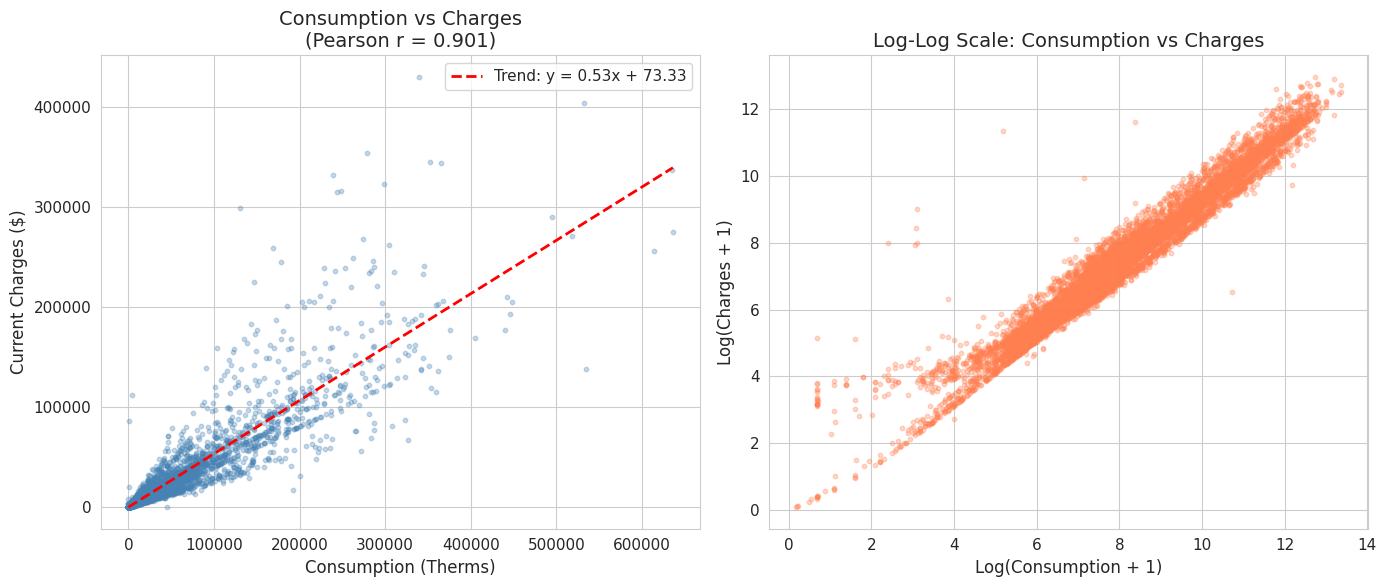


----------------------------------------
6.2 CONSUMPTION BY BOROUGH
----------------------------------------
               count      mean    median       std  min          max
borough                                                             
BRONX          56208 21,941.38  2,884.00 52,117.57 0.18 1,784,927.64
BROOKLYN       91001 18,002.14  1,790.00 45,376.59 0.30 2,351,667.00
MANHATTAN      56677 22,769.18  2,732.00 51,465.27 0.20 1,253,053.00
QUEENS         10295 44,762.18 17,802.00 70,705.10 0.60   604,020.00
STATEN ISLAND   4417 27,610.63 17,868.17 29,039.32 1.00   167,333.00

Kruskal-Wallis Test:
  H-statistic: 6636.9183, p-value: 0.0000e+00
  Significant difference between boroughs: Yes


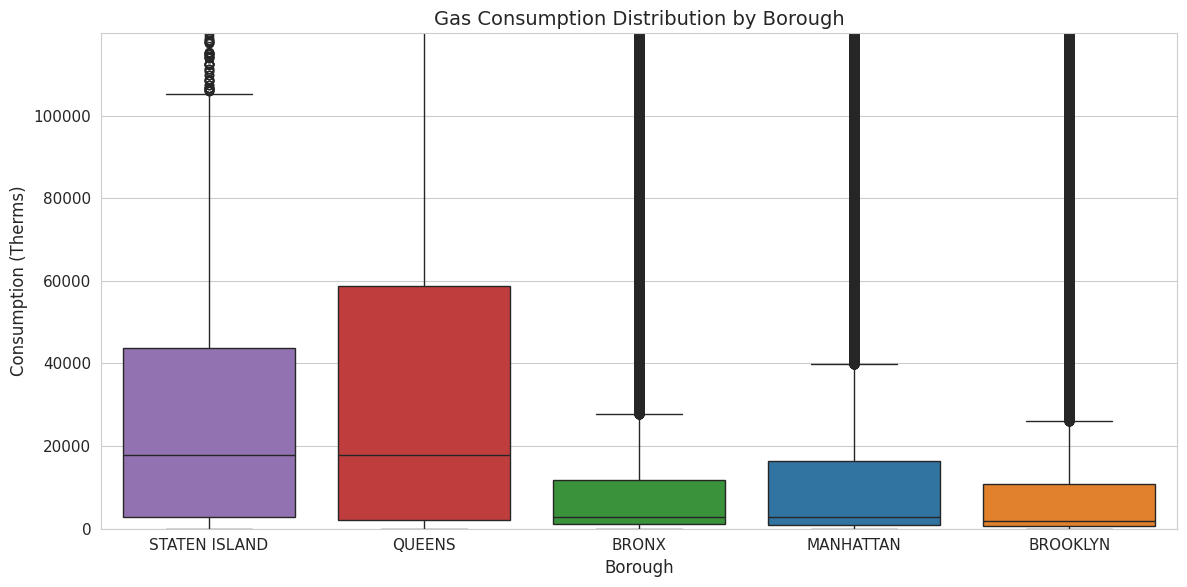

             count      mean    median       std
vendor_code                                     
CE           63009 23,595.43  2,925.00 53,890.97
DE           32165 22,312.22  2,722.00 50,559.77
ECP          14822 26,075.47  2,938.00 56,874.50
HE            8766 18,500.68  2,376.50 40,139.38
HESS         26886 19,709.66  2,540.00 46,607.96
NG-LI         1319 43,605.05 19,565.00 68,507.91
NG-NYC       53199 18,593.22  1,882.00 43,951.32
OTH          18432 22,522.31  2,425.50 55,015.45
             count  mean  median  std
vendor_code                          
CE           62723  0.82    0.71 0.49
DE           32158  0.51    0.53 0.09
ECP          14822  0.43    0.40 0.09
HE            8766  0.56    0.56 0.05
HESS         26885  0.59    0.59 0.16
NG-LI         1282  1.75    0.34 2.42
NG-NYC       53012  0.49    0.40 0.44
OTH          18423  0.48    0.47 0.20


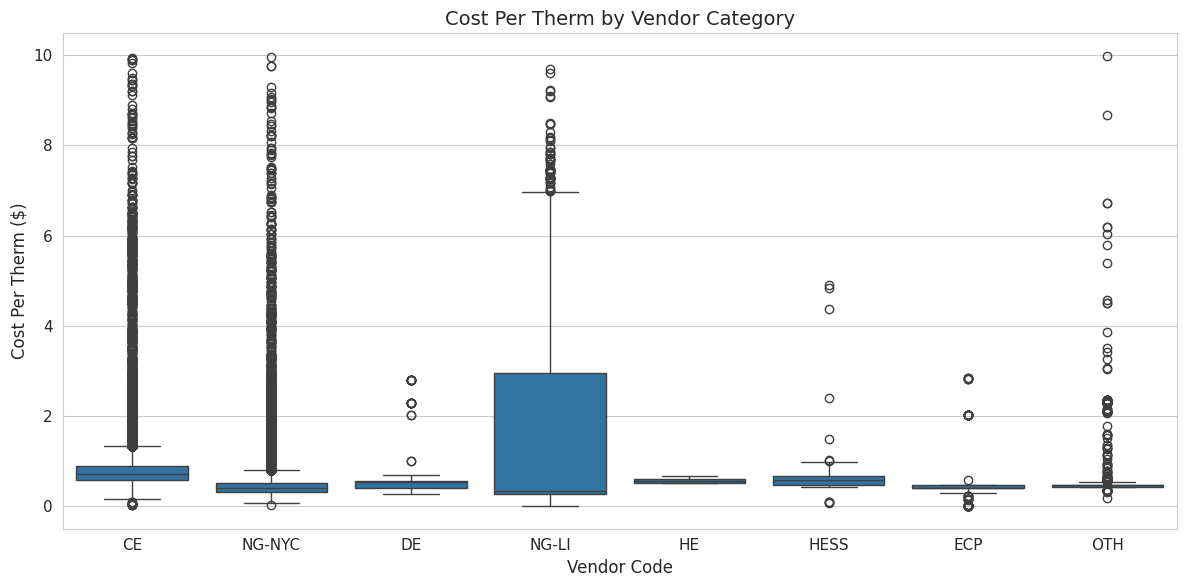


----------------------------------------
6.5 NATIONAL GRID vs CONED COMPARISON
----------------------------------------

Consumption Comparison:
  National Grid - Mean: 19,198.35, Median: 1,917.00
  ConEd - Mean: 23,595.43, Median: 2,925.00

Charges Comparison:
  National Grid - Mean: $6,728.22, Median: $771.20
  ConEd - Mean: $16,479.88, Median: $2,260.34

Mann-Whitney U Test (Charges):
  U-statistic: 1,227,947,283.00, p-value: 0.0000e+00
  Significant difference: Yes


In [ ]:
# =============================================================================
# VENDOR CODE MAPPING
# =============================================================================
vendor_codes = {
    'CONSOLIDATED EDISON COMPANY OF NY': 'CE',
    'National Grid NYC': 'NG-NYC',
    'National Grid LI': 'NG-LI',
    'DIRECT ENERGY BUSINESS (32179)': 'DE',
    'Hudson Energy ServicesB': 'HE',
    'EAST COAST POWER & GAS': 'ECP',
    'HESS CORPORATION (905243) - 2': 'HESS'
}

# Apply mapping to create new column
df_clean['vendor_code'] = df_clean['vendor_name'].map(vendor_codes).fillna('OTH')

# Verify the mapping
print("Vendor Code Mapping:")
print(df_clean.groupby(['vendor_name', 'vendor_code']).size().reset_index(name='count'))

# Filter for positive values
df_positive = df_clean[(df_clean['consumption_therms'] > 0) & (df_clean['current_charges'] > 0)].copy()

# Correlation analysis
pearson_corr, pearson_p = pearsonr(df_positive['consumption_therms'], df_positive['current_charges'])
spearman_corr, spearman_p = spearmanr(df_positive['consumption_therms'], df_positive['current_charges'])

print(f"Pearson Correlation: {pearson_corr:.4f} (p-value: {pearson_p:.4e})")
print(f"Spearman Correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4e})")

# Scatter plot with regression line
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sample for visualization (if dataset is large)
sample_size = min(10000, len(df_positive))
df_sample = df_positive.sample(sample_size)

axes[0].scatter(df_sample['consumption_therms'], df_sample['current_charges'],
               alpha=0.3, s=10, c='steelblue')
z = np.polyfit(df_sample['consumption_therms'], df_sample['current_charges'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_sample['consumption_therms'].min(), df_sample['consumption_therms'].max(), 100)
axes[0].plot(x_line, p(x_line), "r--", linewidth=2, label=f'Trend: y = {z[0]:.2f}x + {z[1]:.2f}')
axes[0].set_xlabel('Consumption (Therms)')
axes[0].set_ylabel('Current Charges ($)')
axes[0].set_title(f'Consumption vs Charges\n(Pearson r = {pearson_corr:.3f})')
axes[0].legend()

# Log-log scale
axes[1].scatter(np.log1p(df_sample['consumption_therms']),
                np.log1p(df_sample['current_charges']),
                alpha=0.3, s=10, c='coral')
axes[1].set_xlabel('Log(Consumption + 1)')
axes[1].set_ylabel('Log(Charges + 1)')
axes[1].set_title('Log-Log Scale: Consumption vs Charges')

plt.tight_layout()
plt.savefig('fig_consumption_vs_charges.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.2 Consumption by Borough
print("\n" + "-" * 40)
print("6.2 CONSUMPTION BY BOROUGH")
print("-" * 40)

borough_stats = df_positive.groupby('borough')['consumption_therms'].agg([
  'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)
print(borough_stats)

# Kruskal-Wallis test (non-parametric ANOVA)
borough_groups = [group['consumption_therms'].values for name, group in df_positive.groupby('borough')]
h_stat, kw_p = kruskal(*borough_groups)
print(f"\nKruskal-Wallis Test:")
print(f"  H-statistic: {h_stat:.4f}, p-value: {kw_p:.4e}")
print(f"  Significant difference between boroughs: {'Yes' if kw_p < 0.05 else 'No'}")

# Box plot
fig, ax = plt.subplots(figsize=(12, 6))
borough_order = df_positive.groupby('borough')['consumption_therms'].median().sort_values(ascending=False).index
sns.boxplot(data=df_positive, x='borough', y='consumption_therms', order=borough_order,
            palette=BOROUGH_COLORS, ax=ax)
ax.set_xlabel('Borough')
ax.set_ylabel('Consumption (Therms)')
ax.set_title('Gas Consumption Distribution by Borough')
ax.set_ylim(0, df_positive['consumption_therms'].quantile(0.95))  # Limit y-axis for readability
plt.tight_layout()
plt.savefig('fig_consumption_by_borough.png', dpi=300, bbox_inches='tight')
plt.show()


vendor_stats = df_positive.groupby('vendor_code')['consumption_therms'].agg([
    'count', 'mean', 'median', 'std'
]).round(2)
print(vendor_stats)

# 6.4 Cost Per Therm by Vendor
df_valid_cost = df_positive[df_positive['cost_per_therm'].notna() &
                                 (df_positive['cost_per_therm'] > 0) &
                                 (df_positive['cost_per_therm'] < 10)]  # Filter extreme values

cost_stats = df_valid_cost.groupby('vendor_code')['cost_per_therm'].agg([
        'count', 'mean', 'median', 'std'
    ]).round(4)
print(cost_stats)

# Box plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_valid_cost, x='vendor_code', y='cost_per_therm', ax=ax)
ax.set_xlabel('Vendor Code')
ax.set_ylabel('Cost Per Therm ($)')
ax.set_title('Cost Per Therm by Vendor Category')
plt.tight_layout()
plt.savefig('fig_cost_per_therm_by_vendor.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.5 National Grid vs ConEd Comparison
print("\n" + "-" * 40)
print("6.5 NATIONAL GRID vs CONED COMPARISON")
print("-" * 40)

ng_data = df_positive[df_positive['vendor_code'].isin(['NG-NYC', 'NG-LI'])]
coned_data = df_positive[df_positive['vendor_code'] == 'CE']

if len(ng_data) > 0 and len(coned_data) > 0:
  print("\nConsumption Comparison:")
  print(f"  National Grid - Mean: {ng_data['consumption_therms'].mean():,.2f}, "
        f"Median: {ng_data['consumption_therms'].median():,.2f}")
  print(f"  ConEd - Mean: {coned_data['consumption_therms'].mean():,.2f}, "
        f"Median: {coned_data['consumption_therms'].median():,.2f}")

  print("\nCharges Comparison:")
  print(f"  National Grid - Mean: ${ng_data['current_charges'].mean():,.2f}, "
        f"Median: ${ng_data['current_charges'].median():,.2f}")
  print(f"  ConEd - Mean: ${coned_data['current_charges'].mean():,.2f}, "
        f"Median: ${coned_data['current_charges'].median():,.2f}")

  # Mann-Whitney U test
  stat, p_value = mannwhitneyu(ng_data['current_charges'], coned_data['current_charges'])
  print(f"\nMann-Whitney U Test (Charges):")
  print(f"  U-statistic: {stat:,.2f}, p-value: {p_value:.4e}")
  print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

#### **Time Series Analysis**

Date Range: 2010-01-01 00:00:00 to 2024-12-01 00:00:00
Total Months: 168


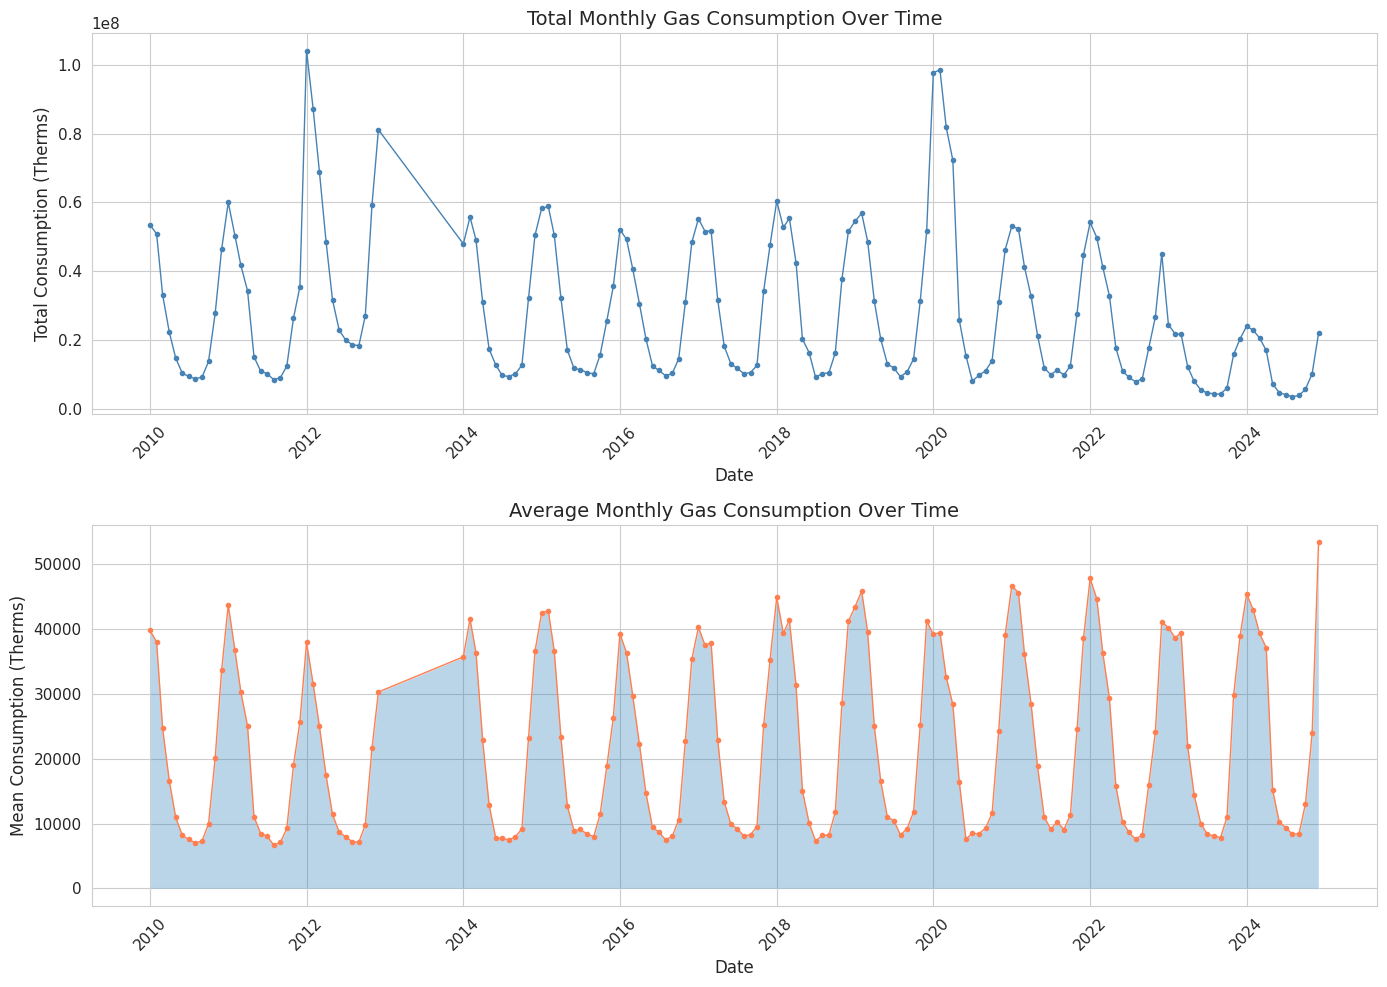

Average Consumption by Month:
  Jan: 41,185.96 therms
  Feb: 39,116.92 therms
  Mar: 33,305.12 therms
  Apr: 24,205.21 therms
  May: 13,879.36 therms
  Jun: 9,153.67 therms
  Jul: 8,482.77 therms
  Aug: 7,845.66 therms
  Sep: 8,059.31 therms
  Oct: 10,883.19 therms
  Nov: 23,097.91 therms
  Dec: 35,197.15 therms


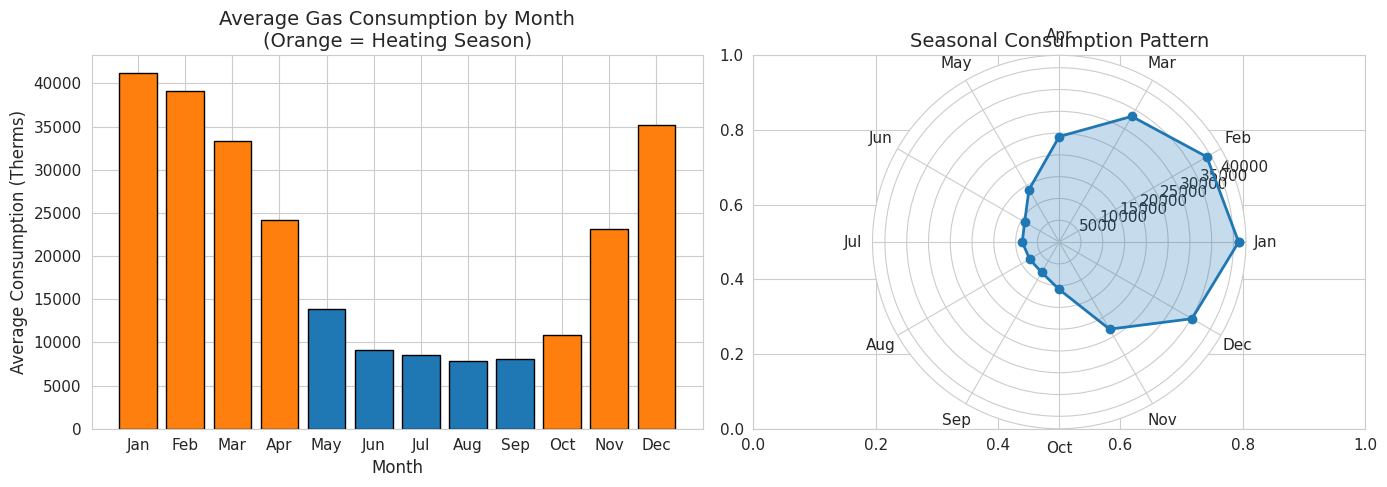

      consumption_therms_sum  consumption_therms_mean  \
year                                                    
2010          299,656,176.54                18,906.95   
2011          313,959,416.85                19,551.59   
2012          587,363,623.80                18,175.63   
2014          338,215,402.94                20,737.96   
2015          337,092,794.22                21,036.74   
2016          329,787,095.65                20,524.46   
2017          348,111,056.17                21,731.14   
2018          382,555,738.65                23,792.26   
2019          353,473,301.90                24,312.08   
2020          511,411,263.28                24,807.73   
2021          328,001,273.63                24,417.57   
2022          321,313,444.55                24,451.22   
2023          148,592,415.46                22,517.41   
2024          145,232,835.87                26,172.79   

      consumption_therms_count  current_charges_sum  current_charges_mean  
year       

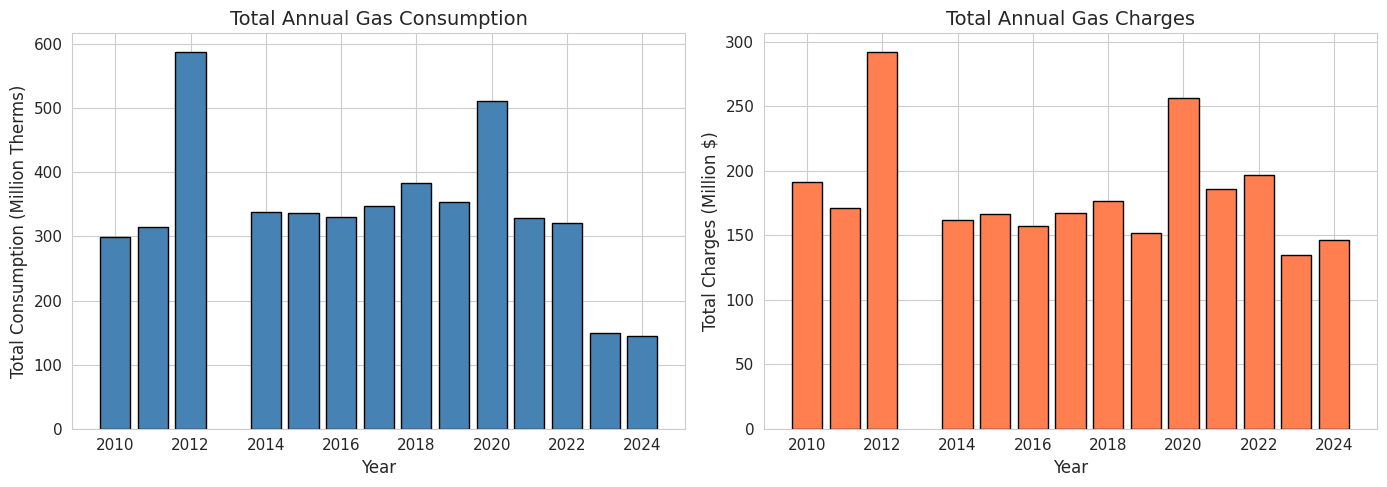

                       consumption_therms_mean  consumption_therms_median  \
Non-Heating (May-Sep)                 9,557.13                   1,226.00   
Heating (Oct-Apr)                    29,774.54                   3,492.70   

                       consumption_therms_sum  consumption_therms_count  \
Non-Heating (May-Sep)          833,820,983.26                     87246   
Heating (Oct-Apr)            3,910,944,856.25                    131352   

                       current_charges_mean  current_charges_median  \
Non-Heating (May-Sep)              5,003.44                  677.54   
Heating (Oct-Apr)                 16,113.48                2,020.16   

                       current_charges_sum  
Non-Heating (May-Sep)       436,530,070.89  
Heating (Oct-Apr)         2,116,537,569.37  

Mann-Whitney U Test (Heating vs Non-Heating):
 U-statistic: 7,658,300,061.50, p-value: 0.0000e+00
 Significant difference: Yes


In [ ]:
df_positive = df_clean[(df_clean['consumption_therms'] > 0) & (df_clean['current_charges'] > 0)].copy()

# 8.1 Monthly Trends

monthly_stats = df_positive.groupby('revenue_month').agg({
        'consumption_therms': ['sum', 'mean', 'median', 'count'],
        'current_charges': ['sum', 'mean', 'median']
    }).round(2)
monthly_stats.columns = ['_'.join(col) for col in monthly_stats.columns]

print(f"Date Range: {monthly_stats.index.min()} to {monthly_stats.index.max()}")
print(f"Total Months: {len(monthly_stats)}")

# Time series plot
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Total consumption over time
axes[0].plot(monthly_stats.index, monthly_stats['consumption_therms_sum'],
            marker='o', markersize=3, linewidth=1, color='steelblue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Consumption (Therms)')
axes[0].set_title('Total Monthly Gas Consumption Over Time')
axes[0].tick_params(axis='x', rotation=45)

# Mean consumption over time
axes[1].plot(monthly_stats.index, monthly_stats['consumption_therms_mean'],
            marker='o', markersize=3, linewidth=1, color='coral')
axes[1].fill_between(monthly_stats.index, monthly_stats['consumption_therms_mean'], alpha=0.3)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Mean Consumption (Therms)')
axes[1].set_title('Average Monthly Gas Consumption Over Time')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('fig_monthly_trends.png', dpi=300, bbox_inches='tight')
plt.show()

# 8.2 Seasonal Patterns

monthly_avg = df_positive.groupby('month')['consumption_therms'].mean()
month_names = [calendar.month_abbr[m] for m in monthly_avg.index]

print("Average Consumption by Month:")
for m, avg in monthly_avg.items():
    print(f"  {calendar.month_abbr[m]}: {avg:,.2f} therms")

# Seasonal bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = ['#ff7f0e' if m in [10, 11, 12, 1, 2, 3, 4] else '#1f77b4' for m in monthly_avg.index]
axes[0].bar(month_names, monthly_avg.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Consumption (Therms)')
axes[0].set_title('Average Gas Consumption by Month\n(Orange = Heating Season)')

# Polar/Radial plot for seasonality
theta = np.linspace(0, 2 * np.pi, 12, endpoint=False)
values = monthly_avg.values
values = np.append(values, values[0])  # Close the circle
theta = np.append(theta, theta[0])

ax_polar = plt.subplot(122, projection='polar')
ax_polar.plot(theta, values, 'o-', linewidth=2)
ax_polar.fill(theta, values, alpha=0.25)
ax_polar.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
ax_polar.set_xticklabels([calendar.month_abbr[m] for m in range(1, 13)])
ax_polar.set_title('Seasonal Consumption Pattern')

plt.tight_layout()
plt.savefig('fig_seasonal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

# 8.3 Year-over-Year Comparison
yearly_stats = df_positive.groupby('year').agg({
        'consumption_therms': ['sum', 'mean', 'count'],
        'current_charges': ['sum', 'mean']
    }).round(2)
yearly_stats.columns = ['_'.join(col) for col in yearly_stats.columns]
print(yearly_stats)

# Year comparison chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(yearly_stats.index, yearly_stats['consumption_therms_sum'] / 1e6,
            color='steelblue', edgecolor='black')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Consumption (Million Therms)')
axes[0].set_title('Total Annual Gas Consumption')

axes[1].bar(yearly_stats.index, yearly_stats['current_charges_sum'] / 1e6,
                color='coral', edgecolor='black')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Charges (Million $)')
axes[1].set_title('Total Annual Gas Charges')

plt.tight_layout()
plt.savefig('fig_yearly_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 8.4 Heating Season Analysis
heating_stats = df_positive.groupby('is_heating_season').agg({
        'consumption_therms': ['mean', 'median', 'sum', 'count'],
        'current_charges': ['mean', 'median', 'sum']
    }).round(2)
heating_stats.columns = ['_'.join(col) for col in heating_stats.columns]
heating_stats.index = ['Non-Heating (May-Sep)', 'Heating (Oct-Apr)']
print(heating_stats)

# Statistical test
heating = df_positive[df_positive['is_heating_season'] == True]['consumption_therms']
non_heating = df_positive[df_positive['is_heating_season'] == False]['consumption_therms']

stat, p_value = mannwhitneyu(heating, non_heating)
print(f"\nMann-Whitney U Test (Heating vs Non-Heating):")
print(f" U-statistic: {stat:,.2f}, p-value: {p_value:.4e}")
print(f" Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Conclusion

## NYCHA Energy Consumption Analysis — Supporting Grid Reliability and Blackout Prevention

---

### Study Context
New York City's energy grid faces increasing strain from aging infrastructure, extreme weather events, and concentrated demand in public housing. As highlighted by NYISO's 2025-2034 Comprehensive Reliability Plan, potential shortfalls are predicted as early as summer 2026 without intervention. This exploratory analysis examined natural gas consumption patterns in NYCHA housing across the five NYC boroughs to establish a foundation for demand forecasting and grid reliability planning.

---

### Dataset Summary
- **Records Analyzed:** 239,955 billing records
- **Coverage:** Bronx, Brooklyn, Manhattan, Queens, and Staten Island
- **Time Period:** 2010–2025 (10+ years of historical data)
- **Primary Vendors:** Consolidated Edison (ConEd) and National Grid
- **Key Metrics:** Consumption (Therms), Current Charges, Cost per Therm

---

### Technical Notes
- Data exploration is critical for large datasets — making assumptions before analysis can corrupt results
- Vendor codes (CE, NG-NYC, DE, etc.) were applied to prevent label overlap in visualizations
- Records with "FHA" and "Non Development" in the Borough column were excluded as these represent funding sources, not valid geographic locations

---

### Data Quality Findings

**Missing Data Classification:**
- Rate Class and Meter Scope had the highest percentage of missing values
- Both are classified as **Missing at Random (MAR)** based on chi-square tests
- Potential causes include:
  - Single-building meters where scope is implied by structure
  - Older meters ("NONE" AMR type) with less complete records
  - Varying vendor data reporting practices
  - Smaller developments not requiring scope documentation

**Implication for Forecasting:** Missing data patterns must be addressed to ensure model reliability in future predictive analyses.

---

### Key Findings for Demand Prediction

**1. Seasonal Consumption Patterns**
- Heating season (October–April) shows significantly higher consumption than non-heating months
- **Heating Season:** Median consumption of 3,492.70 therms; total of 3.9 billion therms
- **Non-Heating Season:** Median consumption of 1,226.00 therms; total of 833.8 million therms
- Mann-Whitney U test confirms significant difference (p < 0.05)
- **Implication:** Forecasting models must incorporate strong seasonal components to predict winter demand surges

**2. Geographic Variation**
- Consumption varies significantly across boroughs (Kruskal-Wallis test, p < 0.05)
- Brooklyn and the Bronx account for the largest share of total consumption
- **Implication:** Borough-specific models are needed; high-consumption areas should be prioritized for demand response programs

**3. Vendor Comparison (ConEd vs. National Grid)**
- Significant differences exist in median charges between vendors (Mann-Whitney U, p < 0.05)
- Different service territories exhibit distinct consumption and pricing profiles
- **Implication:** Vendor-specific forecasts should align with grid management zones

**4. Consumption Distribution**
- Gas consumption is highly right-skewed with significant outliers
- Large multi-building developments drive demand spikes
- **Implication:** Monitoring high-consumption developments is critical for preventing localized grid overloads

**5. Cost-Consumption Relationship**
- Strong positive correlation between consumption and charges (Pearson r > 0.90)
- **Implication:** Charge data can serve as a proxy when consumption records are incomplete

---

### Statistical Summary

| Hypothesis Test | Method | Result | Forecasting Implication |
|-----------------|--------|--------|-------------------------|
| Consumption differs by borough | Kruskal-Wallis | Significant (p < 0.05) | Borough-specific models needed |
| Charges differ by vendor (NG vs. ConEd) | Mann-Whitney U | Significant (p < 0.05) | Vendor segmentation required |
| Heating vs. non-heating consumption | Mann-Whitney U | Significant (p < 0.05) | Seasonal component essential |
| Variance homogeneity across boroughs | Levene's Test | Significant (p < 0.05) | Heterogeneous variance must be modeled |

---

### Limitations
- Missing Rate Class values limit rate-based demand analysis, particularly for brokered gas
- External factors (weather HDD/CDD, building age, occupancy) not included in this dataset
- Data ends in 2020 — post-pandemic consumption patterns may differ

---

### Recommendations for Predictive Modeling (Next Phase)

| Recommendation | Purpose |
|----------------|---------|
| **Time Series Forecasting (ARIMA, Holt-Winters)** | Predict daily/monthly demand to anticipate peak periods |
| **Machine Learning Ensemble (Random Forest, XGBoost)** | Capture non-linear consumption dynamics |
| **Weather Integration (HDD/CDD)** | Model temperature impact on heating demand |
| **Anomaly Detection** | Flag unusual spikes indicating meter issues or demand surges |
| **Borough-Specific Models** | Account for geographic variation in consumption |
| **Real-Time Dashboard** | Enable grid operators to visualize demand and trigger alerts |

---

### Final Summary
This exploratory data analysis establishes a critical foundation for predicting energy demand in NYCHA housing and supporting New York City's grid reliability efforts. Key findings reveal that seasonal patterns, geographic variation, and vendor differences significantly influence gas consumption — all factors that must be incorporated into forecasting models.

The heating season (October–April) drives demand nearly **three times higher** than non-heating months, representing the primary risk period for grid stress. Brooklyn and the Bronx emerge as high-consumption boroughs requiring targeted monitoring. By leveraging these insights in subsequent ARIMA and machine learning models, city planners and utility providers can proactively manage grid capacity, implement demand response programs, and protect vulnerable populations from service disruptions during peak demand events.

These findings directly support NYISO's call for strategic energy planning and provide actionable intelligence for maintaining grid stability as New York transitions toward a more resilient energy future.

---







**References**


New York Independent System Operator. (2025). Power trends 2025. Retrieved December 19, 2025, from https://www.nyiso.com/documents/20142/2223020/2025-Power-Trends.pdf

